In [1]:
!pip install torch torchvision torchaudio
!pip install matplotlib opencv-python pandas
!pip install notebook
!pip install python-docx


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os

# Usamos r"" para evitar errores con espacios y backslashes en Windows
carpeta = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion"
contenido = os.listdir(carpeta)
print("Contenido de la carpeta:", carpeta)
for item in contenido:
    print("  📄", item)



Contenido de la carpeta: C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion
  📄 Buendia_transcription.docx
  📄 pages
  📄 segmented


In [6]:
from PIL import Image
import os
import matplotlib.pyplot as plt

ruta_segmentos = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion\segmented"

def mostrar_segmento(indice=0):
    imagenes = [f for f in os.listdir(ruta_segmentos) if f.endswith(('.png', '.jpg'))]
    imagenes.sort()

    if indice >= len(imagenes):
        print("⚠️ Índice fuera de rango.")
        return

    nombre_imagen = imagenes[indice]
    ruta_imagen = os.path.join(ruta_segmentos, nombre_imagen)

    print("📂 Ruta completa de la imagen:", ruta_imagen)

    try:
        imagen = Image.open(ruta_imagen)
        print("✅ Imagen cargada correctamente.")
        plt.imshow(imagen)
        plt.title(f"Segmento: {nombre_imagen}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("❌ Error al abrir la imagen:", e)



📂 Ruta completa de la imagen: C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion\segmented\Buendia - Instruccion_page_1-postprocessed.png_line_11.png
✅ Imagen cargada correctamente.


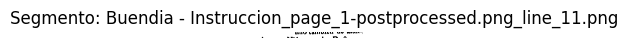

In [7]:
mostrar_segmento(0)


In [8]:
from docx import Document

# 📄 Ruta al archivo de transcripción
ruta_transcripcion = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion\Buendia_transcription.docx"

# 🧾 Leer y dividir por líneas
def obtener_lineas_transcripcion(ruta_docx):
    documento = Document(ruta_docx)
    lineas = []
    for parrafo in documento.paragraphs:
        texto = parrafo.text.strip()
        if texto:  # Ignorar líneas vacías
            lineas.append(texto)
    return lineas

# ▶️ Ejecutar y mostrar las primeras 5 líneas
lineas = obtener_lineas_transcripcion(ruta_transcripcion)
for i, linea in enumerate(lineas[:5]):
    print(f"Línea {i+1}: {linea}")


Línea 1: PDF p1
Línea 2: Al
INFINITAMENTE AMABLE
NIÑO JESUS.
Línea 3: A Vos, Dulcissimo Niño
JESUS, que no solo os
dignasteis de llamaros
Doctor de los Niños, 
sino también de assis-
tir como Niño entre los Doctores, 
se consagra humilde esta pequeña
Instrucción de los Niños. Es assi, 
que ella también se dirige a la ju-
ventud; pero a esta, como recuer-
do de lo que aprendió, a los Ni-
ños, como precisa explicacion de 
lo que deben estudiar. Por este so-
lo titulo es muy vuestra; y por
ser para Niños, que confiais a la
educacion de vuestra Compañia, 
lo es mucho mas. En Vos, (Divi-
no Exemplar de todas las virtu-
des) tienen abreviado el mas se-
Línea 4: PDF p2
Línea 5: guro disseño de su edad: la Reli-
gion para con Dios en la devota		vinas bendiciones, les unisteis
assistencia a los Templos; la piedad	a vuestro sagrado pecho con sua-
con los Padres en la obediencia		vissimos abrazos. Dichosa edad,
mas rendida; y la modestia, y de-	
seo de saber, con los mayores, 		riños!
gustando ma

In [9]:
def mostrar_segmento_con_texto(indice=0):
    imagenes = [f for f in os.listdir(ruta_segmentos) if f.endswith(('.png', '.jpg'))]
    imagenes.sort()

    if indice >= len(imagenes) or indice >= len(lineas):
        print("⚠️ Índice fuera de rango para imágenes o líneas.")
        return

    nombre_imagen = imagenes[indice]
    ruta_imagen = os.path.join(ruta_segmentos, nombre_imagen)
    texto_linea = lineas[indice]

    print(f"📂 Imagen: {nombre_imagen}")
    print(f"📝 Texto asociado: {texto_linea}")

    try:
        imagen = Image.open(ruta_imagen)
        plt.imshow(imagen)
        plt.title(f"Texto: {texto_linea}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("❌ Error al abrir la imagen:", e)


📂 Imagen: Buendia - Instruccion_page_1-postprocessed.png_line_13.png
📝 Texto asociado: A Vos, Dulcissimo Niño
JESUS, que no solo os
dignasteis de llamaros
Doctor de los Niños, 
sino también de assis-
tir como Niño entre los Doctores, 
se consagra humilde esta pequeña
Instrucción de los Niños. Es assi, 
que ella también se dirige a la ju-
ventud; pero a esta, como recuer-
do de lo que aprendió, a los Ni-
ños, como precisa explicacion de 
lo que deben estudiar. Por este so-
lo titulo es muy vuestra; y por
ser para Niños, que confiais a la
educacion de vuestra Compañia, 
lo es mucho mas. En Vos, (Divi-
no Exemplar de todas las virtu-
des) tienen abreviado el mas se-


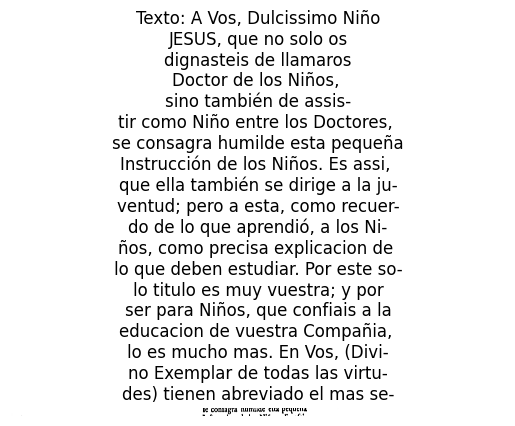

In [10]:
mostrar_segmento_con_texto(2)  # Por ejemplo, línea 2


In [11]:
# Crear lista de pares (ruta_imagen, texto)
pares_entrenamiento = []

imagenes = [f for f in os.listdir(ruta_segmentos) if f.endswith(('.png', '.jpg'))]
imagenes.sort()

# Asegurar que el número de líneas y de imágenes coincida
cantidad = min(len(imagenes), len(lineas))

for i in range(cantidad):
    nombre_imagen = imagenes[i]
    ruta_completa = os.path.join(ruta_segmentos, nombre_imagen)
    texto = lineas[i]
    pares_entrenamiento.append((ruta_completa, texto))

print(f"✅ {len(pares_entrenamiento)} pares preparados para entrenamiento.")
print("🧾 Ejemplo:")
print(pares_entrenamiento[0])


✅ 8 pares preparados para entrenamiento.
🧾 Ejemplo:
('C:\\Users\\Manuel Peña Torres\\Foodlens\\dataset\\pdfs - Copy\\Buendia - Instruccion\\segmented\\Buendia - Instruccion_page_1-postprocessed.png_line_11.png', 'PDF p1')


🖼️ Tamaño original: 10667x174
📐 Nuevo tamaño tras resize: 2048x64


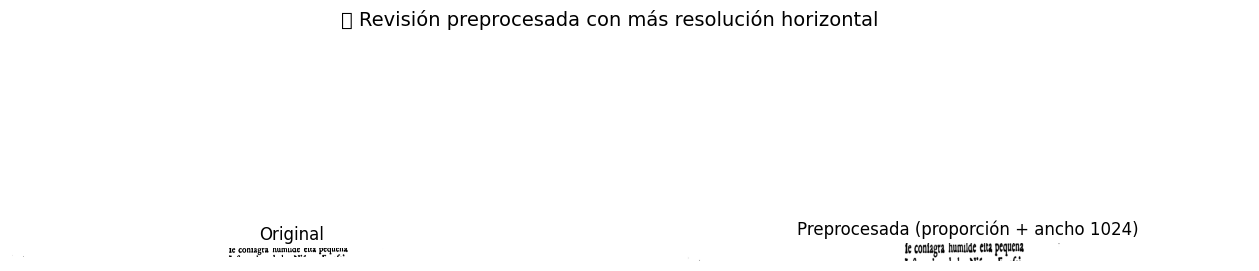

📝 Texto asociado: A Vos, Dulcissimo Niño
JESUS, que no solo os
dignasteis de llamaros
Doctor de los Niños, 
sino también de assis-
tir como Niño entre los Doctores, 
se consagra humilde esta pequeña
Instrucción de los Niños. Es assi, 
que ella también se dirige a la ju-
ventud; pero a esta, como recuer-
do de lo que aprendió, a los Ni-
ños, como precisa explicacion de 
lo que deben estudiar. Por este so-
lo titulo es muy vuestra; y por
ser para Niños, que confiais a la
educacion de vuestra Compañia, 
lo es mucho mas. En Vos, (Divi-
no Exemplar de todas las virtu-
des) tienen abreviado el mas se-
📐 Dimensión final del tensor: torch.Size([1, 64, 2048])


In [22]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Clase para mantener proporciones con mayor ancho permitido
class ResizeKeepRatio:
    def __init__(self, height, max_width):
        self.height = height
        self.max_width = max_width

    def __call__(self, img):
        w, h = img.size
        print(f"🖼️ Tamaño original: {w}x{h}")
        new_w = int(self.height * w / h)
        new_w = min(new_w, self.max_width)
        print(f"📐 Nuevo tamaño tras resize: {new_w}x{self.height}")
        return img.resize((new_w, self.height), Image.BICUBIC)

# Seleccionar imagen y texto
ruta_img = pares_entrenamiento[2][0]
texto = pares_entrenamiento[2][1]

# Transformación con más ancho
resize_keep_ratio = ResizeKeepRatio(height=64, max_width=2048)

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    resize_keep_ratio,
    transforms.ToTensor()
])

# Aplicar transformación
imagen_pil = Image.open(ruta_img)
imagen_tensor = transform(imagen_pil)

# Visualizar
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].imshow(imagen_pil.convert('L'), cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(imagen_tensor.squeeze(0), cmap='gray')
axs[1].set_title("Preprocesada (proporción + ancho 1024)")
axs[1].axis('off')

plt.suptitle("🔍 Revisión preprocesada con más resolución horizontal", fontsize=14)
plt.show()

# Diagnóstico
print("📝 Texto asociado:", texto)
print("📐 Dimensión final del tensor:", imagen_tensor.shape)


In [18]:
from torch.utils.data import Dataset
import torch
from PIL import Image

class OCRDataset(Dataset):
    def __init__(self, pares, transform=None, vocab=None):
        self.pares = pares
        self.transform = transform
        self.vocab = vocab or self.build_vocab()

    def build_vocab(self):
        chars = set()
        for _, text in self.pares:
            chars.update(text)
        vocab = sorted(list(chars))
        return {c: i + 1 for i, c in enumerate(vocab)}  # +1 porque 0 será para CTC blank

    def encode_text(self, text):
        return [self.vocab[c] for c in text if c in self.vocab]

    def __getitem__(self, idx):
        img_path, text = self.pares[idx]
        img = Image.open(img_path).convert('L')
        if self.transform:
            img = self.transform(img)
        target = torch.tensor(self.encode_text(text), dtype=torch.long)
        return img, target

    def __len__(self):
        return len(self.pares)


In [19]:
def ocr_collate_fn(batch):
    imgs, targets = zip(*batch)
    
    # Pad imágenes (con ceros en ancho)
    max_width = max(img.shape[-1] for img in imgs)
    padded_imgs = torch.zeros(len(imgs), 1, 32, max_width)
    for i, img in enumerate(imgs):
        padded_imgs[i, :, :, :img.shape[-1]] = img

    # Concatenar targets y calcular longitudes
    target_lengths = torch.tensor([t.size(0) for t in targets])
    targets_concat = torch.cat(targets)

    # Longitudes de entrada para CTC (suponemos stride de 4 en ancho)
    input_lengths = torch.tensor([max_width // 4] * len(imgs))  # dependerá de tu CNN

    return padded_imgs, targets_concat, input_lengths, target_lengths


In [20]:
from torch.utils.data import DataLoader

# Crear dataset
dataset = OCRDataset(pares_entrenamiento, transform=transform)

# Crear DataLoader
loader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=ocr_collate_fn)

# Probar un batch
imgs, targets, input_lengths, target_lengths = next(iter(loader))
print("📦 Imágenes batch:", imgs.shape)
print("🔡 Targets concatenados:", targets.shape)
print("🔢 Input lengths:", input_lengths)
print("🔢 Target lengths:", target_lengths)


🖼️ Tamaño original: 10667x172
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x174
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x159
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x131
📐 Nuevo tamaño tras resize: 1024x32
📦 Imágenes batch: torch.Size([4, 1, 32, 1024])
🔡 Targets concatenados: torch.Size([2242])
🔢 Input lengths: tensor([256, 256, 256, 256])
🔢 Target lengths: tensor([1009,  584,  643,    6])


🖼️ Tamaño original: 10667x171
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x159
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x171
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x174
📐 Nuevo tamaño tras resize: 1024x32


C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_30852\805256422.py:33: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_30852\805256422.py:33: UserWarning: Glyph 128196 (\N{PAGE FACING UP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


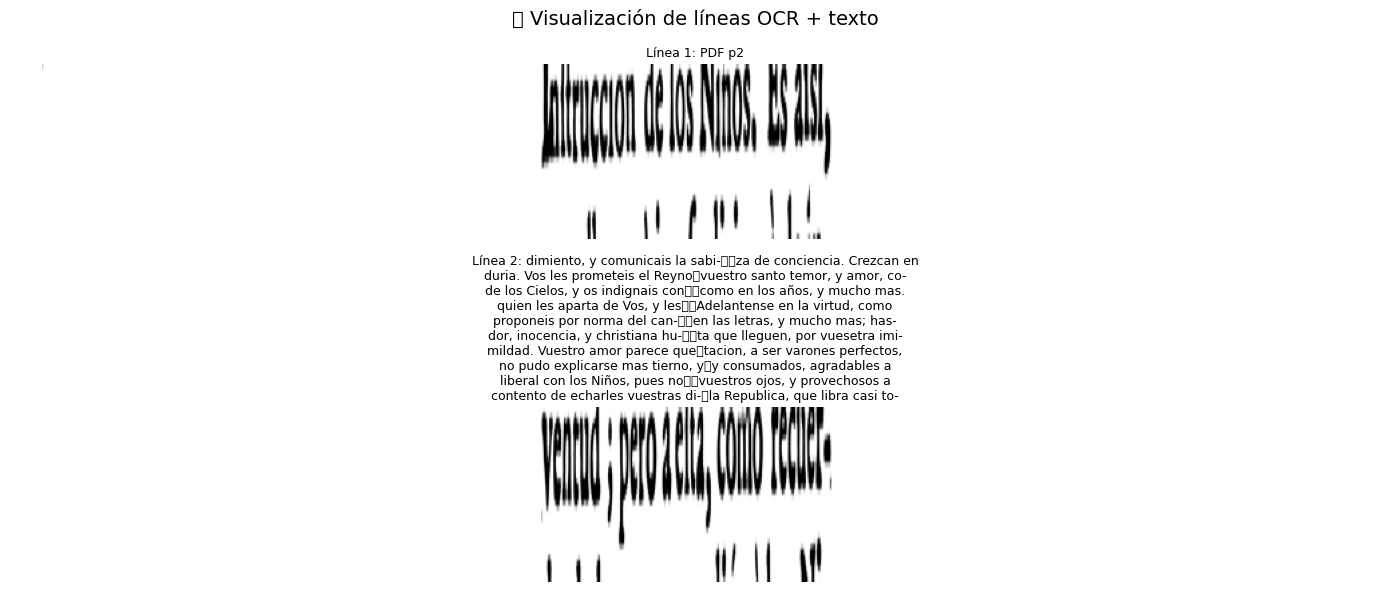

In [23]:
import matplotlib.pyplot as plt

# Invertir vocabulario para decodificar (índice → caracter)
idx2char = {v: k for k, v in dataset.vocab.items()}

def decode_sequence(seq):
    return ''.join([idx2char.get(i.item(), '?') for i in seq])

def mostrar_batch(loader, n=2):  # n = 2 líneas visibles
    imgs, targets, input_lengths, target_lengths = next(iter(loader))
    
    fig, axs = plt.subplots(n, 1, figsize=(14, 3 * n))
    if n == 1:
        axs = [axs]

    idx2char = {v: k for k, v in dataset.vocab.items()}
    def decode_sequence(seq):
        return ''.join([idx2char.get(i.item(), '?') for i in seq])

    start = 0
    for i in range(n):
        img = imgs[i].squeeze(0).numpy()
        target_len = target_lengths[i].item()
        target = targets[start:start + target_len]
        texto = decode_sequence(target)

        axs[i].imshow(img, cmap='gray', aspect='auto')
        axs[i].set_title(f"Línea {i+1}: {texto}", fontsize=9)
        axs[i].axis('off')
        start += target_len

    plt.suptitle("📄 Visualización de líneas OCR + texto", fontsize=14)
    plt.tight_layout()
    plt.show()
# Ejecutar
mostrar_batch(loader, n=2)


In [24]:
import torch.nn as nn

class CRNN(nn.Module):
    def __init__(self, img_h, num_classes):
        super(CRNN, self).__init__()

        # CNN para extraer características
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),  # (B, 64, 32, W)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                          # (B, 64, 16, W//2)

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                          # (B, 128, 8, W//4)

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 1)),                        # (B, 256, 4, W//4)

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 1)),                        # (B, 512, 2, W//4)
        )

        # LSTM bidireccional
        self.rnn = nn.LSTM(
            input_size=512 * 2,   # altura fija 2
            hidden_size=256,
            num_layers=2,
            bidirectional=True,
            batch_first=True
        )

        # Clasificador final
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.cnn(x)                           # (B, C, H, W)
        b, c, h, w = x.size()
        assert h == 2, "La altura debe ser 2 después de la CNN"
        x = x.permute(0, 3, 1, 2)                 # (B, W, C, H)
        x = x.reshape(b, w, c * h)                # (B, W, C*H)

        x, _ = self.rnn(x)                        # (B, W, 2*hidden)
        x = self.fc(x)                            # (B, W, num_classes)
        x = x.permute(1, 0, 2)                    # (W, B, C) → para CTC
        return x


In [25]:
ctc_loss = nn.CTCLoss(blank=0, zero_infinity=True)


In [27]:
# Construir el vocabulario si aún no está
vocab = dataset.vocab  # si ya lo tienes generado en el OCRDataset
num_classes = len(vocab) + 1  # +1 por el token 'blank' que usa CTC

# Crear el modelo
model = CRNN(img_h=32, num_classes=num_classes).to(device)


In [28]:
import torch.optim as optim

# Supongamos que ya tienes esto:
# model = CRNN(img_h=32, num_classes=len(vocab)).to(device)
# dataset, loader, vocab y collate_fn ya definidos
# idx_to_char = {i: c for c, i in vocab.items()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer y pérdida
optimizer = optim.Adam(model.parameters(), lr=0.001)
ctc_loss = nn.CTCLoss(blank=0, zero_infinity=True)

# Entrenamiento
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch in loader:
        images, targets, input_lengths, target_lengths = batch
        images = images.to(device)
        targets = targets.to(device)
        input_lengths = input_lengths.to(device)
        target_lengths = target_lengths.to(device)

        # Forward
        logits = model(images)                   # (W, B, C)
        log_probs = torch.nn.functional.log_softmax(logits, dim=2)

        # Calcular pérdida
        loss = ctc_loss(log_probs, targets, input_lengths, target_lengths)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(loader)
    print(f"📚 Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")


🖼️ Tamaño original: 10667x131
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x159
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x174
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x174
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x171
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x171
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x172
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x172
📐 Nuevo tamaño tras resize: 1024x32
📚 Epoch 1/10 - Loss: 60.8886
🖼️ Tamaño original: 10667x131
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x159
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x171
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x171
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x172
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x174
📐 Nuevo tamaño tras resize: 1024x32
🖼️ Tamaño original: 10667x174
📐 Nuevo tamaño tr

In [33]:
import os
import glob
from docx import Document

def obtener_lineas_transcripcion(ruta_docx):
    doc = Document(ruta_docx)
    lineas = []
    for p in doc.paragraphs:
        texto = p.text.strip()
        if texto:
            lineas.append(texto)
    return lineas

def encontrar_docx_en(carpeta):
    archivos_docx = glob.glob(os.path.join(carpeta, "*.docx"))
    return archivos_docx[0] if archivos_docx else None

def cargar_todo_dataset(ruta_base):
    pares = []
    print(f"📂 Recorriendo: {ruta_base}")
    
    for carpeta in os.listdir(ruta_base):
        ruta_libro = os.path.join(ruta_base, carpeta)
        ruta_docx = encontrar_docx_en(ruta_libro)
        ruta_segmentos = os.path.join(ruta_libro, "segmented")

        if not ruta_docx or not os.path.isdir(ruta_segmentos):
            print(f"⚠️ Saltando {carpeta} (falta .docx o carpeta segmented)")
            continue

        lineas = obtener_lineas_transcripcion(ruta_docx)
        imagenes = sorted([f for f in os.listdir(ruta_segmentos) if f.endswith('.png')])
        cantidad = min(len(imagenes), len(lineas))

        for i in range(cantidad):
            ruta_img = os.path.join(ruta_segmentos, imagenes[i])
            pares.append((ruta_img, lineas[i]))

        print(f"✅ {carpeta}: {cantidad} pares")

    print(f"📊 Total de pares cargados: {len(pares)}")
    return pares


In [34]:
ruta_dataset = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy"
pares_entrenamiento = cargar_todo_dataset(ruta_dataset)


📂 Recorriendo: C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy
✅ Buendia - Instruccion: 8 pares
✅ Constituciones sinodales Calahorra 1602: 10 pares
✅ Ezcaray - Vozes: 7 pares
✅ Mendo - Principe perfecto: 135 pares
✅ Paredes - Reglas generales: 55 pares
✅ PORCONES.228.35  1636: 6 pares
📊 Total de pares cargados: 221


In [35]:
from collections import Counter

# Extraer todos los caracteres únicos
todos_los_textos = [texto for _, texto in pares_entrenamiento]
contador = Counter("".join(todos_los_textos))
caracteres_unicos = sorted(contador.keys())

# Crear vocabulario (blank=0 es reservado)
vocab = {c: i + 1 for i, c in enumerate(caracteres_unicos)}  # desde 1
vocab['<BLANK>'] = 0
idx_to_char = {i: c for c, i in vocab.items()}

print(f"🔠 Total de caracteres únicos (sin contar BLANK): {len(caracteres_unicos)}")
print(f"📚 Vocabulario ejemplo: {dict(list(vocab.items())[:10])}")


🔠 Total de caracteres únicos (sin contar BLANK): 77
📚 Vocabulario ejemplo: {'\t': 1, '\n': 2, ' ': 3, '!': 4, '&': 5, '(': 6, ')': 7, ',': 8, '-': 9, '.': 10}


In [36]:
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms

class ResizeKeepRatio:
    def __init__(self, height=32, max_width=1024):
        self.height = height
        self.max_width = max_width

    def __call__(self, img):
        w, h = img.size
        new_w = int(self.height * w / h)
        new_w = min(new_w, self.max_width)
        return img.resize((new_w, self.height), Image.BICUBIC)

class OCRDataset(Dataset):
    def __init__(self, pares, vocab, max_width=1024):
        self.pares = pares
        self.vocab = vocab
        self.transform = transforms.Compose([
            transforms.Grayscale(1),
            ResizeKeepRatio(height=32, max_width=max_width),
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.pares)

    def __getitem__(self, idx):
        ruta_img, texto = self.pares[idx]
        imagen = Image.open(ruta_img)
        imagen = self.transform(imagen)
        labels = torch.tensor([self.vocab[c] for c in texto], dtype=torch.long)
        return imagen, labels, texto


In [40]:
from torch.nn.functional import pad

def collate_fn(batch):
    imgs, labels, textos = zip(*batch)
    
    # Obtener el ancho máximo del batch
    max_w = max(img.shape[-1] for img in imgs)
    
    # Padear cada imagen al mismo ancho
    padded_imgs = [pad(img, (0, max_w - img.shape[-1]), value=1.0) for img in imgs]
    imgs_tensor = torch.stack(padded_imgs)

    # Procesar las etiquetas
    targets = torch.cat([torch.tensor(l, dtype=torch.long) for l in labels])
    input_lengths = torch.tensor([img.shape[-1] // 4 for img in imgs])  # W//4 por CNN
    target_lengths = torch.tensor([len(l) for l in labels])

    return imgs_tensor, targets, input_lengths, target_lengths, textos


In [41]:
from torch.utils.data import DataLoader

dataset = OCRDataset(pares_entrenamiento, vocab)
loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)


C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_30852\2260865813.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.cat([torch.tensor(l, dtype=torch.long) for l in labels])
C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_30852\2592266968.py:17: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_30852\2592266968.py:17: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Manuel Peña Torres\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


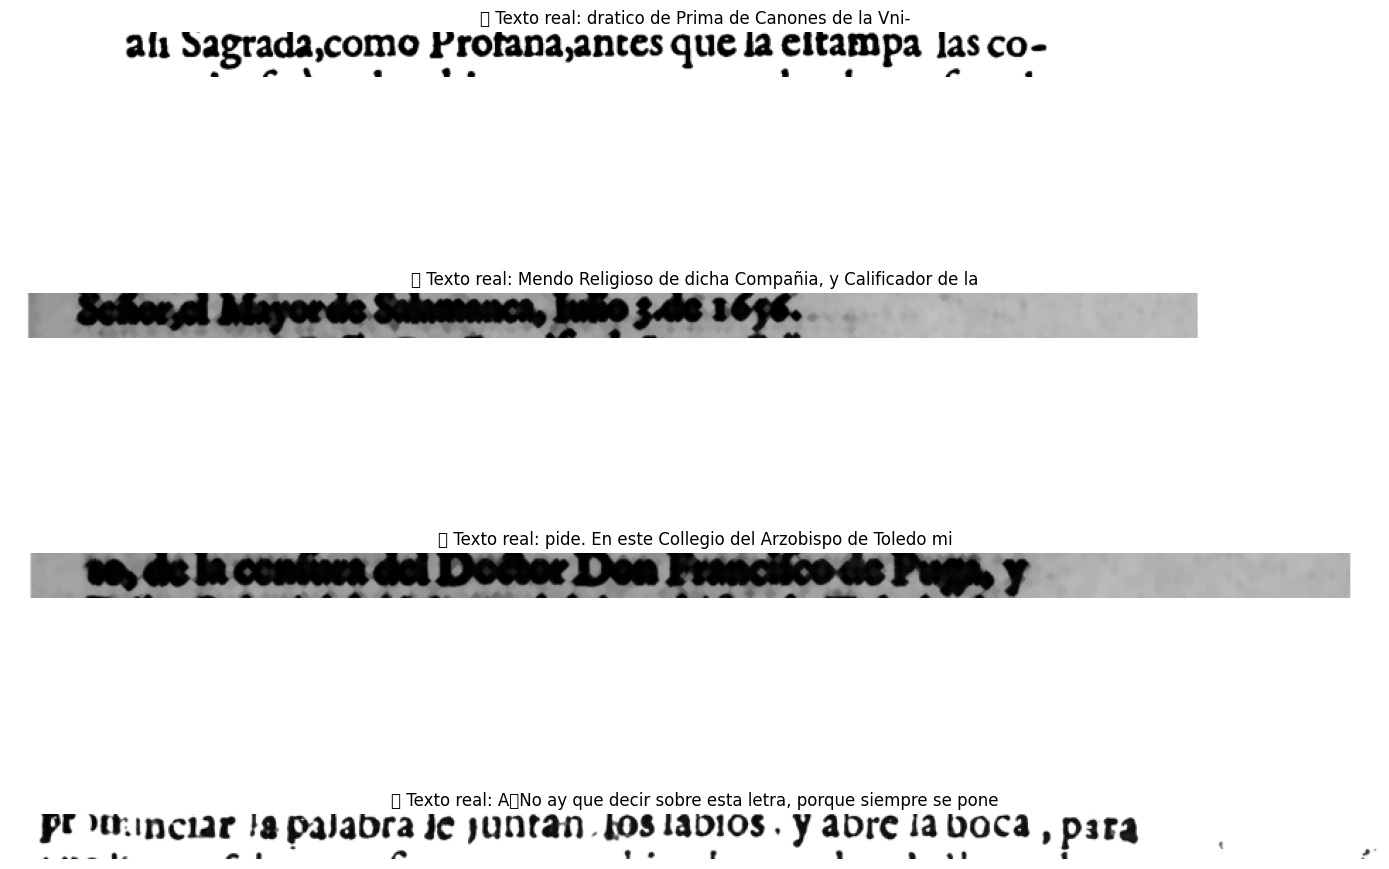

In [42]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Obtener un batch
batch_imgs, batch_labels, input_lengths, label_lengths, textos = next(iter(loader))

# Mostrar hasta 4 imágenes con su texto
num_to_show = min(4, len(batch_imgs))
fig, axs = plt.subplots(num_to_show, 1, figsize=(14, 3 * num_to_show))

for i in range(num_to_show):
    img = TF.to_pil_image(batch_imgs[i].squeeze(0))  # Quitar canal
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f"📝 Texto real: {textos[i]}", fontsize=12)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
from docx import Document

def obtener_lineas_transcripcion_limpias(ruta_docx):
    from docx import Document
    doc = Document(ruta_docx)
    lineas = []
    for p in doc.paragraphs:
        texto = p.text.strip()
        if texto:
            for linea in texto.splitlines():
                linea = linea.strip()
                if linea:
                    lineas.append(linea)
    return lineas

def cargar_dataset_linea_a_linea(ruta_base):
    pares = []
    print(f"📂 Recorriendo: {ruta_base}")

    for carpeta in os.listdir(ruta_base):
        ruta_carpeta = os.path.join(ruta_base, carpeta)
        ruta_docx = os.path.join(ruta_carpeta, f"{carpeta.split(' - ')[0]}_transcription.docx")
        ruta_segmentos = os.path.join(ruta_carpeta, "segmented")

        if not os.path.isfile(ruta_docx) or not os.path.isdir(ruta_segmentos):
            print(f"⚠️ Saltando {carpeta} (falta .docx o carpeta segmented)")
            continue

        lineas = obtener_lineas_transcripcion_limpias(ruta_docx)
        imagenes = sorted([f for f in os.listdir(ruta_segmentos) if f.endswith('.png')])

        if len(lineas) != len(imagenes):
            print(f"❌ ERROR en {carpeta}: {len(imagenes)} imágenes vs {len(lineas)} líneas. No coincide exactamente.")
            continue

        for img_nombre, texto in zip(imagenes, lineas):
            ruta_img = os.path.join(ruta_segmentos, img_nombre)
            pares.append((ruta_img, texto))

        print(f"✅ {carpeta}: {len(lineas)} pares añadidos")

    print(f"\n📊 Total de pares cargados: {len(pares)}")
    return pares


In [49]:
ruta_dataset = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy"
pares = cargar_dataset_con_validacion(ruta_dataset)


📂 Recorriendo: C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy
⚠️ Desalineación en Buendia - Instruccion: 73 imágenes vs 5 textos. Usando mínimo común.
✅ Buendia - Instruccion: 5 pares añadidos
⚠️ Desalineación en Constituciones sinodales Calahorra 1602: 91 imágenes vs 7 textos. Usando mínimo común.
✅ Constituciones sinodales Calahorra 1602: 7 pares añadidos
⚠️ Desalineación en Ezcaray - Vozes: 66 imágenes vs 4 textos. Usando mínimo común.
✅ Ezcaray - Vozes: 4 pares añadidos
✅ Mendo - Principe perfecto: 135 pares añadidos
✅ Paredes - Reglas generales: 55 pares añadidos
⚠️ Desalineación en PORCONES.228.35  1636: 56 imágenes vs 4 textos. Usando mínimo común.
✅ PORCONES.228.35  1636: 4 pares añadidos
📊 Total de pares cargados: 210


In [50]:
def cargar_dataset_linea_a_linea(ruta_base):
    pares = []
    print(f"📂 Recorriendo: {ruta_base}")

    for carpeta in os.listdir(ruta_base):
        ruta_carpeta = os.path.join(ruta_base, carpeta)
        ruta_docx = os.path.join(ruta_carpeta, f"{carpeta.split(' - ')[0]}_transcription.docx")
        ruta_segmentos = os.path.join(ruta_carpeta, "segmented")

        if not os.path.isfile(ruta_docx) or not os.path.isdir(ruta_segmentos):
            print(f"⚠️ Saltando {carpeta} (falta .docx o carpeta segmented)")
            continue

        lineas = obtener_lineas_transcripcion_limpias(ruta_docx)
        imagenes = sorted([f for f in os.listdir(ruta_segmentos) if f.endswith('.png')])

        if len(lineas) != len(imagenes):
            print(f"❌ ERROR en {carpeta}: {len(imagenes)} imágenes vs {len(lineas)} líneas. No coincide exactamente.")
            continue

        for img_nombre, texto in zip(imagenes, lineas):
            ruta_img = os.path.join(ruta_segmentos, img_nombre)
            pares.append((ruta_img, texto))

        print(f"✅ {carpeta}: {len(lineas)} pares añadidos")

    print(f"\n📊 Total de pares cargados: {len(pares)}")
    return pares


In [51]:
ruta_dataset = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy"
pares = cargar_dataset_linea_a_linea(ruta_dataset)


📂 Recorriendo: C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy
❌ ERROR en Buendia - Instruccion: 73 imágenes vs 5 líneas. No coincide exactamente.
⚠️ Saltando Constituciones sinodales Calahorra 1602 (falta .docx o carpeta segmented)
❌ ERROR en Ezcaray - Vozes: 66 imágenes vs 4 líneas. No coincide exactamente.
✅ Mendo - Principe perfecto: 135 pares añadidos
✅ Paredes - Reglas generales: 55 pares añadidos
⚠️ Saltando PORCONES.228.35  1636 (falta .docx o carpeta segmented)

📊 Total de pares cargados: 190


ESTO VA MAL

In [ ]:
#import torch
#from torch.utils.data import Dataset, DataLoader
#from PIL import Image
#import torchvision.transforms as transforms


In [ ]:
# class OCRDataset(Dataset):
#     def __init__(self, pares_imagen_texto, transformacion=None):
#         self.datos = pares_imagen_texto
#         self.transformacion = transformacion

#     def __len__(self):
#         return len(self.datos)

#     def __getitem__(self, indice):
#         ruta_imagen, texto = self.datos[indice]

#         imagen = Image.open(ruta_imagen).convert("L")  # L = escala de grises

#         if self.transformacion:
#             imagen = self.transformacion(imagen)

#         return imagen, texto


: 

In [ ]:
# from PIL import ImageOps

# class RedimensionarOCR:
#     def __init__(self, alto_objetivo=32, ancho_objetivo=256):
#         self.alto_obj = alto_objetivo
#         self.ancho_obj = ancho_objetivo

#     def __call__(self, imagen):
#         ancho_original, alto_original = imagen.size
#         escala = self.alto_obj / alto_original
#         nuevo_ancho = int(ancho_original * escala)
#         imagen_redimensionada = imagen.resize((nuevo_ancho, self.alto_obj), Image.BILINEAR)

#         if nuevo_ancho < self.ancho_obj:
#             padding = (0, 0, self.ancho_obj - nuevo_ancho, 0)
#             imagen_redimensionada = ImageOps.expand(imagen_redimensionada, padding, fill=255)
#         elif nuevo_ancho > self.ancho_obj:
#             imagen_redimensionada = imagen_redimensionada.crop((0, 0, self.ancho_obj, self.alto_obj))

#         return imagen_redimensionada


In [ ]:
# transformacion_ocr = transforms.Compose([
#     RedimensionarOCR(32, 256),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ])



In [ ]:
# dataset_ocr = OCRDataset(pares_entrenamiento, transformacion=transformacion_ocr)

# cargador_datos = DataLoader(
#     dataset_ocr,
#     batch_size=16,
#     shuffle=True,
#     num_workers=0
# )


In [ ]:
# imagenes, textos = next(iter(cargador_datos))
# print(f"Tamaño batch de imágenes: {imagenes.shape}")  # [batch, canales, alto, ancho]
# print(f"Ejemplo de texto: {textos[0]}")


Tamaño batch de imágenes: torch.Size([8, 1, 32, 256])
Ejemplo de texto: PDF p2


In [ ]:
# from PIL import Image, ImageStat
# import os

# # 🔍 Función para comprobar si una imagen tiene contenido suficiente
# def es_valida(imagen_pil, umbral=0.97):
#     imagen_pil = imagen_pil.convert("L")
#     histograma = imagen_pil.histogram()
#     total_pixeles = sum(histograma)
#     pixeles_blancos = histograma[255]
#     proporcion_blanco = pixeles_blancos / total_pixeles
#     return proporcion_blanco < umbral

# # Paso 1: limpiar líneas de texto
# lineas_limpias = [linea.strip() for linea in lineas if linea.strip() and not linea.lower().startswith("pdf")]

# # Paso 2: cargar y ordenar imágenes segmentadas
# imagenes = [f for f in os.listdir(ruta_segmentos) if f.endswith(('.png', '.jpg'))]
# imagenes.sort()

# # Paso 3: emparejar solo las que coincidan en cantidad
# cantidad = min(len(imagenes), len(lineas_limpias))

# pares_entrenamiento = []

# # Paso 4: filtrar por tamaño y contenido visual
# for i in range(cantidad):
#     ruta_completa = os.path.join(ruta_segmentos, imagenes[i])
#     texto = lineas_limpias[i]

#     with Image.open(ruta_completa) as im:
#         ancho, alto = im.size
#         if ancho > 50 and alto > 10 and es_valida(im):
#             pares_entrenamiento.append((ruta_completa, texto))

# # Resultado final
# print(f"✅ {len(pares_entrenamiento)} pares limpios preparados para entrenamiento.")
# print("🧾 Ejemplo:")
# print(pares_entrenamiento[0])


✅ 5 pares limpios preparados para entrenamiento.
🧾 Ejemplo:
('C:\\Users\\Manuel Peña Torres\\Foodlens\\dataset\\pdfs - Copy\\Buendia - Instruccion\\segmented\\Buendia - Instruccion_page_1-postprocessed.png_line_11.png', 'Al\nINFINITAMENTE AMABLE\nNIÑO JESUS.')


C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_24384\680402806.py:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


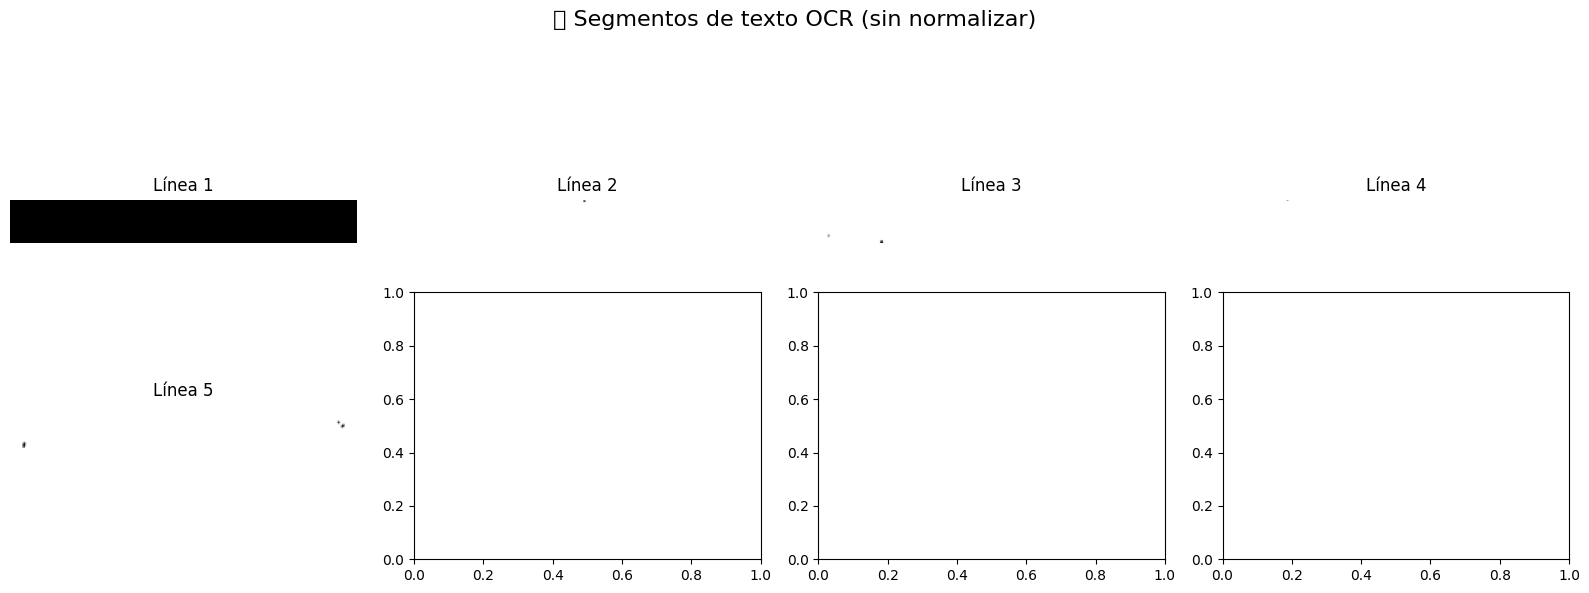

In [ ]:
# # 🔍 Solo para inspección visual
# transformacion_visual = transforms.Compose([
#     RedimensionarOCR(32, 256),
#     transforms.ToTensor()
# ])

# # Dataset solo para ver imágenes sin normalizar
# dataset_visual = OCRDataset(pares_entrenamiento, transformacion=transformacion_visual)

# # Dataloader pequeño
# dataloader_visual = DataLoader(dataset_visual, batch_size=8, shuffle=False)

# # Visualizar un batch
# imagenes, textos = next(iter(dataloader_visual))

# # Mostrar
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2, 4, figsize=(16, 6))
# fig.suptitle("🔍 Segmentos de texto OCR (sin normalizar)", fontsize=16)

# for i, ax in enumerate(axes.flatten()):
#     if i >= len(imagenes):
#         break
#     imagen = imagenes[i].squeeze(0).numpy()  # quitar canal
#     ax.imshow(imagen, cmap='gray')
#     ax.set_title(f"Línea {i+1}")
#     ax.set_xlabel(textos[i][:50] + ("..." if len(textos[i]) > 50 else ""))
#     ax.axis('off')

# plt.tight_layout()
# plt.subplots_adjust(top=0.85)
# plt.show()


C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_24384\420481120.py:20: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


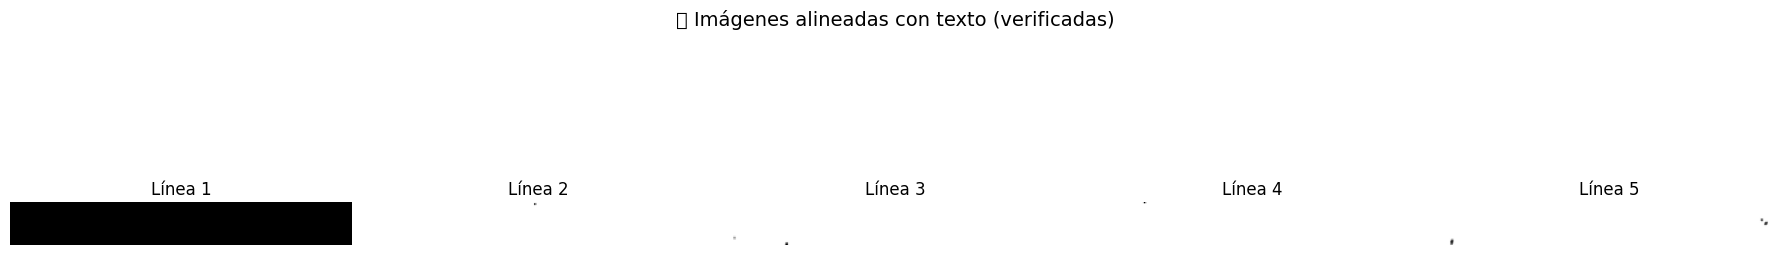

In [ ]:
# # Dataset visual limpio
# dataset_visual = OCRDataset(pares_entrenamiento, transformacion=transformacion_visual)

# # Dataloader
# dataloader_visual = DataLoader(dataset_visual, batch_size=5, shuffle=False)

# # Mostrar
# imagenes, textos = next(iter(dataloader_visual))

# fig, axes = plt.subplots(1, 5, figsize=(18, 4))
# fig.suptitle("✅ Imágenes alineadas con texto (verificadas)", fontsize=14)

# for i, ax in enumerate(axes):
#     imagen = imagenes[i].squeeze(0).numpy()
#     ax.imshow(imagen, cmap='gray')
#     ax.set_title(f"Línea {i+1}")
#     ax.set_xlabel(textos[i][:40] + ("..." if len(textos[i]) > 40 else ""))
#     ax.axis('off')

# plt.tight_layout()
# plt.subplots_adjust(top=0.85)
# plt.show()
